# Part I - Ford GoBike System Data
#### by Ahmed Balkhair

## Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It was established as Bay Area Bike Share and was re-launched later as Ford GoBike in a partnership with Ford Motor Company.

The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area. In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.

## Preliminary Wrangling

In [1]:
!pip install geopy
!pip install seaborn --upgrade

    100% |████████████████████████████████| 122kB 5.1MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 8.6MB/s eta 0:00:01    80% |█████████████████████████▊      | 235kB 12.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01  9% |███                             | 1.2MB 29.1MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.6MB/s eta 0:00:01  8% |██▋                             | 931kB 26.5MB/s eta 0:00:01    60% |███████████████████▌            | 7.0MB 31.2MB/s eta 0:00:01    73% |███████████████████████▋        | 8.5MB 30.6MB/s eta 0:00:01    86% |███████████████████████████▉    | 10.0MB 33.3MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 11.3MB/s ta 0:00:01
    100% |████████████████████████████████| 49.4MB 912kB/s eta 0:00:01  4% |█▋                              | 2.4MB 22.0MB/s eta 0:00:03    10% |███▏                            | 5.0MB 25.3MB/s eta 0:00:02    15% |████▉                     

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import geopy.distance

%matplotlib inline

#### load in the dataset into a pandas dataframe

In [3]:
df= pd.read_csv('fordgobike_tripdata.csv')

#### high-level overview of data shape

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
any(df.duplicated())

False

In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## clean dataframe

#### drop na from columns that are important for the analysis since they are very few compared to the entire data

In [11]:
df.dropna(subset= ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace= True)
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

#### fill na with median value for columns that are not that important but has a considerable amount of missing data

####  for column `member_birth_year`, median is preferred since data is numeric and skewed as shown below.

(1920.0, 2010.0)

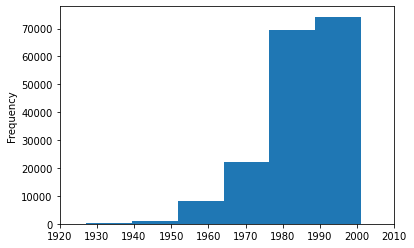

In [12]:
#exploratory data visualization to help choose how to fill missing data

df['member_birth_year'].plot(kind= 'hist')
plt.xlim((1920, 2010))

In [13]:
#fill na with mean for `member_birth_year`
#median is preferred since data is numeric and skewed
median= np.nanmedian(df['member_birth_year'])
df['member_birth_year'].fillna(median,inplace=True)
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

####  for column `member_gender`, mode is preferred since the data is a string(object).

In [14]:
#fill na with mode for `member_gender`
#mode is preferred since the data is a string(object).
mode= df['member_gender'].value_counts().index[0]
df['member_gender'].fillna(mode,inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> at this point, we don't have any NaN or duplicated data

#### quick check before cleaning

In [15]:
# check if all ids and birth date doesn't include decimal values to convert them to string
print(any(round(df['start_station_id']).dropna() != df['start_station_id'].dropna()))
print(any(round(df['end_station_id']).dropna() != df['end_station_id'].dropna()))

False
False


In [16]:
#remove millieseconds from time
df['start_time']= df['start_time'].str[0:-5]
df['end_time']= df['end_time'].str[0:-5]

In [17]:
df['start_time'].head()

0    2019-02-28 17:32:10
1    2019-02-28 18:53:21
2    2019-02-28 12:13:13
3    2019-02-28 17:54:26
4    2019-02-28 23:54:18
Name: start_time, dtype: object

#### convert columns to their appropriate data types

In [18]:
print(df['user_type'].unique())
print(df['member_gender'].unique())

['Customer' 'Subscriber']
['Male' 'Other' 'Female']


In [19]:
#convert `start_time` and `end_time` into Date data type

df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])


#convert `start_station_id`, `end_station_id` into String data type

df['start_station_id']= df['start_station_id'].astype(int).astype(str)
df['end_station_id']= df['end_station_id'].astype(int).astype(str)


#convert `bike_id` into String data type

df['bike_id']= df['bike_id'].astype(str)


#convert `member_birth_year` into Integer data type

df['member_birth_year']= df['member_birth_year'].astype(int)


#convert `user_type` and `member_gender` into Categorical data type

user_cat_dtype= pd.api.types.CategoricalDtype(ordered = False, categories = df['user_type'].unique())
df['user_type']= df['user_type'].astype(user_cat_dtype)

gender_cat_dtype= pd.api.types.CategoricalDtype(ordered = False, categories = df['member_gender'].unique())
df['member_gender']= df['member_gender'].astype(gender_cat_dtype)


#convert `bike_share_for_all_trip` into Boolean data type

df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].map({'Yes': True, 'No': False})  

In [20]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip              bool
dtype: object

#### feature engineering (add new columns)

In [21]:
df['member_age'] = dt.date.today().year - df['member_birth_year']

In [22]:
# split date and time into seprate columns
df[['start_time_date', 'start_time_time']] = df['start_time'].astype(str).str.split(' ', 1, expand=True)

In [23]:
# start time month
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [24]:
#start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%A')

In [25]:
# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [26]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [27]:
#convert `start_time_month` into Categorical data typ
month= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_month= pd.api.types.CategoricalDtype(ordered= True, categories= month)
df['start_time_month'] = df['start_time_month'].astype(ordered_month)

In [28]:
#convert `start_time_weekday` into Categorical data typ
weekday= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_weekday= pd.api.types.CategoricalDtype(ordered= True, categories= weekday)
df['start_time_weekday']= df['start_time_weekday'].astype(ordered_weekday)

In [29]:
def calc_distance(from_lat, from_long, to_lat, to_long):
    return geopy.distance.distance((from_lat, from_long), (to_lat, to_long)).km

In [30]:
df['distance_km'] = df.apply(lambda row: calc_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude), axis=1)

In [31]:
#distance in mile
df['distance_miles'] = df['distance_km'] * 0.621371

In [32]:
# Only keep the events where riders were under 75 years of age
df = df.query('member_age <= 66')

In [33]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_time_date,start_time_time,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
178678,367,2019-02-01 16:38:55,2019-02-01 16:45:03,50,2nd St at Townsend St,37.780526,-122.390288,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,48,2019-02-01,16:38:55,February,Friday,16,16,6,1.685666,1.047424
104540,1228,2019-02-14 08:12:54,2019-02-14 08:33:23,132,24th St at Chattanooga St,37.751819,-122.426614,21,Montgomery St BART Station (Market St at 2nd St),37.789625,...,35,2019-02-14,08:12:54,February,Thursday,8,8,20,4.772425,2.965447
180455,318,2019-02-01 11:03:33,2019-02-01 11:08:52,58,Market St at 10th St,37.776619,-122.417385,112,Harrison St at 17th St,37.763847,...,35,2019-02-01,11:03:33,February,Friday,11,11,5,1.469201,0.912919
141973,705,2019-02-07 17:27:38,2019-02-07 17:39:24,187,Jack London Square,37.796248,-122.279352,195,Bay Pl at Vernon St,37.812314,...,37,2019-02-07,17:27:38,February,Thursday,17,17,11,2.419776,1.503579
179708,672,2019-02-01 12:57:25,2019-02-01 13:08:38,324,Union Square (Powell St at Post St),37.788300,-122.408531,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,52,2019-02-01,12:57:25,February,Friday,12,13,11,1.728423,1.073992


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181401 entries, 0 to 183411
Data columns (total 26 columns):
duration_sec               181401 non-null int64
start_time                 181401 non-null datetime64[ns]
end_time                   181401 non-null datetime64[ns]
start_station_id           181401 non-null object
start_station_name         181401 non-null object
start_station_latitude     181401 non-null float64
start_station_longitude    181401 non-null float64
end_station_id             181401 non-null object
end_station_name           181401 non-null object
end_station_latitude       181401 non-null float64
end_station_longitude      181401 non-null float64
bike_id                    181401 non-null object
user_type                  181401 non-null category
member_birth_year          181401 non-null int64
member_gender              181401 non-null category
bike_share_for_all_trip    181401 non-null bool
member_age                 181401 non-null int64
start_time_date     

In [35]:
df.to_csv('fordgobike_tripdata_master.csv', index = False)

### `At this stage, our dataframe is fairly clean`

### What is the structure of your dataset?

> The initial FordGoBike dataset was consisted of 16 features and 183412 records. The data collected is for February 2019 of approximately 183,412 bike rides in the San Francisco Bay area of California, USA documented.

> The columns were as follow:

- `duration_sec`
- `start_time`
- `end_time`
- `start_station_id`
- `start_station_name`
- `start_station_latitude`
- `start_station_longitude`
- `end_station_id`
- `end_station_name`
- `end_station_latitude`
- `end_station_longitude`
- `bike_id`
- `user_type`
- `member_birth_year`
- `member_gender`
- `bike_share_for_all_trip`


### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in our dataset are related to:

primary:
- `No rides`
- `Date & Time`
- `Duration`
- `Distance`

secondry:
- `user_type`
- `member_gender`
- `member_age`
- `start_station_name`
- `end_station_name`


#### All in relation to other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Using feature engineering I came up with new calculated columns as follow:

- `member_age`
- `start_time_date`
- `start_time_time`
- `start_time_month`
- `start_time_weekday`
- `start_time_hour`
- `end_time_hour`
- `duration_min`
- `distance_km`
- `distance_miles`

## Univariate Exploration

In [36]:
base_color= sb.color_palette()[0]
sb.set_style("darkgrid")

### What are the type of users for Ford GoBike?

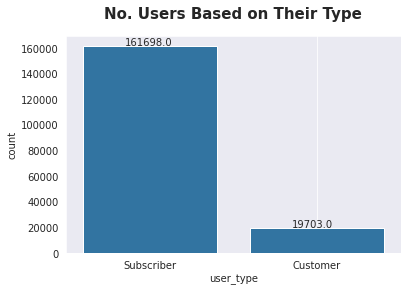

In [37]:
ax= sb.countplot(data= df, x= 'user_type', color= base_color, order= df['user_type'].value_counts().index);

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. Users Based on Their Type', y=1.05, fontsize=15, fontweight='bold');

plt.grid();

plt.show();

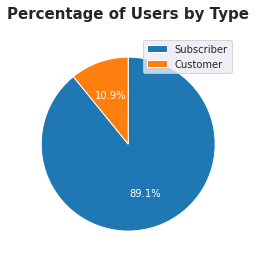

In [38]:
type_of_user = df.user_type.value_counts()

plt.pie(type_of_user, labels= type_of_user.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});

plt.legend();

plt.title("Percentage of Users by Type", y=1.05, fontsize=15, fontweight='bold');

> Most Ford GoBike users are subscribers almost 90% of our data.

### What are the gender of Ford GoBike users?

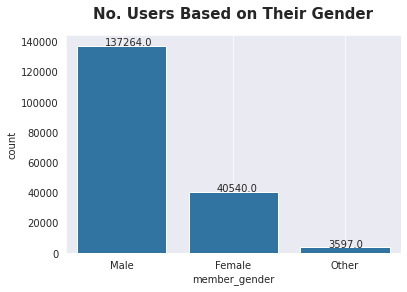

In [39]:
ax= sb.countplot(data= df, x= 'member_gender', color= base_color, order= df['member_gender'].value_counts().index);

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. Users Based on Their Gender', y=1.05, fontsize=15, fontweight='bold');

plt.grid();

plt.show();

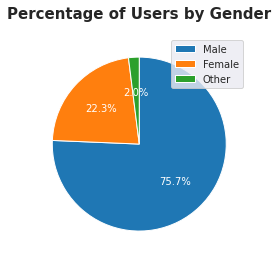

In [40]:
gender = df.member_gender.value_counts()

plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});

plt.legend();

plt.title("Percentage of Users by Gender", y=1.05, fontsize=15, fontweight='bold');

> Most Ford GoBike users are Male 3/4 of our data, followed by female and finally Other (not specified) 

### What is the usage of Ford GoBike system by weekday?

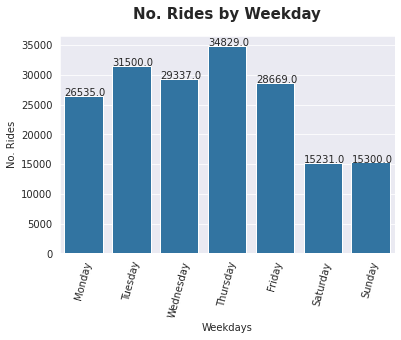

In [41]:
ax= sb.countplot(data= df, x= 'start_time_weekday', color= base_color);

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

ax.set(xlabel= 'Weekdays', ylabel= 'No. Rides')

plt.title('No. Rides by Weekday', y=1.05, fontsize=15, fontweight='bold');

plt.xticks(rotation=75);

plt.show();

> Usually use it on weekdays not weekends (propably for work transporting)

### What is the usage of Ford GoBike system by hour?

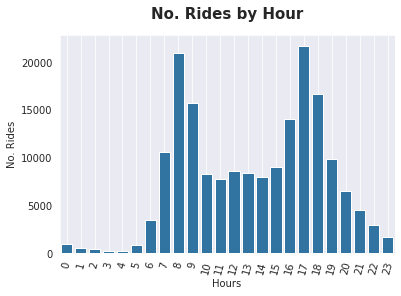

In [42]:
ax= sb.countplot(data= df, x= 'start_time_hour', color= base_color);


ax.set(xlabel= 'Hours', ylabel= 'No. Rides')


plt.title('No. Rides by Hour', y=1.05, fontsize=15, fontweight='bold');

plt.xticks(rotation=75);

plt.grid();

plt.show();

> Usually use it around 8 am and the other time is 6 pm, which strengthen our theory of (work transporting)

### What is the average duration of rides?

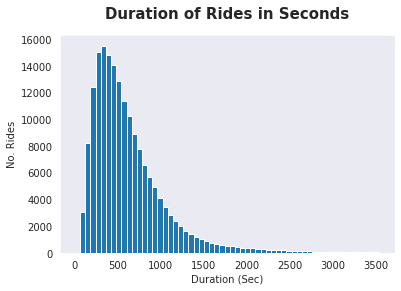

In [43]:
bins = np.arange(0, 3600, 60)

plt.hist(data = df, x = 'duration_sec', bins = bins);

plt.title("Duration of Rides in Seconds", y=1.05, fontsize=15, fontweight='bold');
plt.xlabel('Duration (Sec)');
plt.ylabel('No. Rides');

plt.grid();

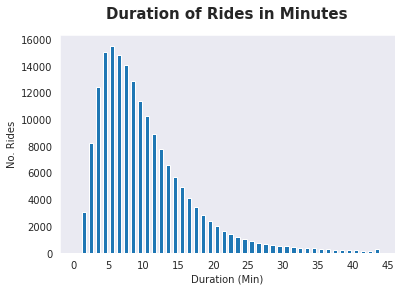

In [44]:
bins = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bins, rwidth = 0.6);

plt.title("Duration of Rides in Minutes", y=1.05, fontsize=15, fontweight='bold');
plt.xlabel('Duration (Min)');
plt.xticks(ticks, labels);
plt.ylabel('No. Rides');
plt.grid();

> Usually rides between 5-10 minutes

### What is the average distance of rides?

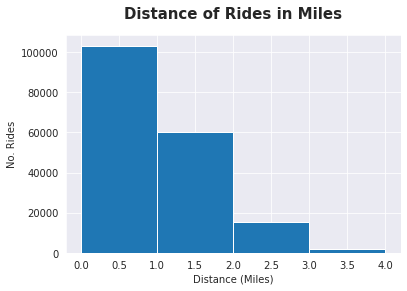

In [45]:
bins = np.arange(0, 5, 1)

plt.hist(data = df, x = 'distance_miles', bins = bins);

plt.title("Distance of Rides in Miles", y=1.05, fontsize=15, fontweight='bold');
plt.xlabel('Distance (Miles)');
plt.ylabel('No. Rides');

> Usually rides for less than 2 Miles

### What is the users' age distribution for Ford GoBike system?

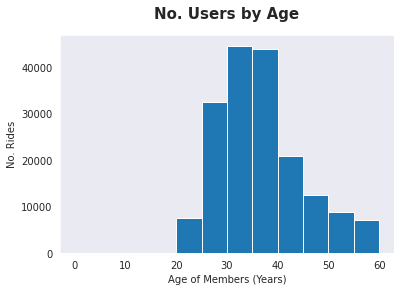

In [46]:
bins = np.arange(0, 65, 5)

plt.hist(data = df, x = 'member_age', bins = bins);

plt.title("No. Users by Age", y=1.05, fontsize=15, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('No. Rides');
plt.grid();

> Few ussers start at age 20, most users are between 30-40, and less users when age is older.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found out that most of the users of FordGoBike are:
- Most are male
- Most are subscribers
- Usually use it on weekdays not weekends (propably for work transporting)
- Usually use it around 8 am and the other time is 6 pm, which strengthen our theory of (work transporting)
- Usually rides between 5-10 minutes
- Usually rides for less than 2 Miles
- Few ussers start at age 20, most users are between 30-40, and less users when age is older.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Due to the big effort spent on cleaning the data before performing any visuallizations, thankfully there were no problems at all.

## Bivariate Exploration

### What is the correlation between the features?

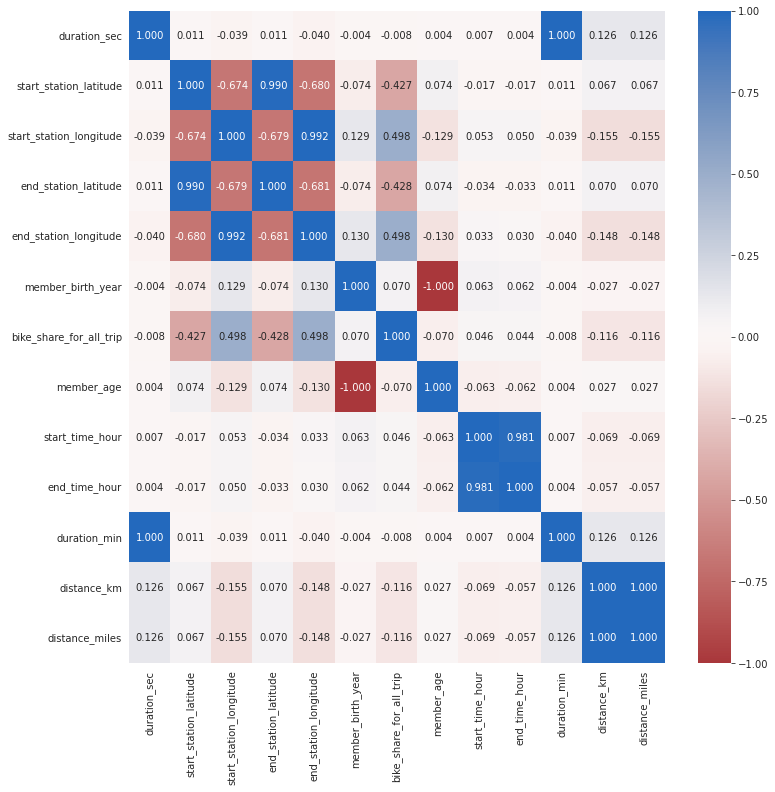

In [47]:
# correlation plot
g= sb.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
g.figure.set_size_inches(12,12)

> We can see that there is a positive correlation between `bike_share_for_all_trip` and (`start_station_longitude` and `end_station_longitude`).

### What is the Avg Trip Duration by User Type?

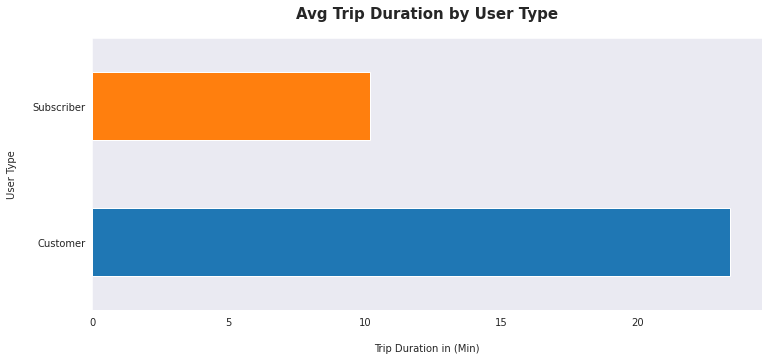

In [48]:
graph = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', figsize=(12,5))

graph.set_title('Avg Trip Duration by User Type', fontsize=15, y=1.05, fontweight='bold');
graph.set_ylabel('User Type', labelpad=15);
graph.set_xlabel('Trip Duration in (Min)', labelpad=16);
plt.grid();

> Even though only 10% of FordGoBike users are customers while the others are subscribers, customer users ride in average more than double the duration a subscriber user does.

### What is the Avg Distance (Miles) by User Type?

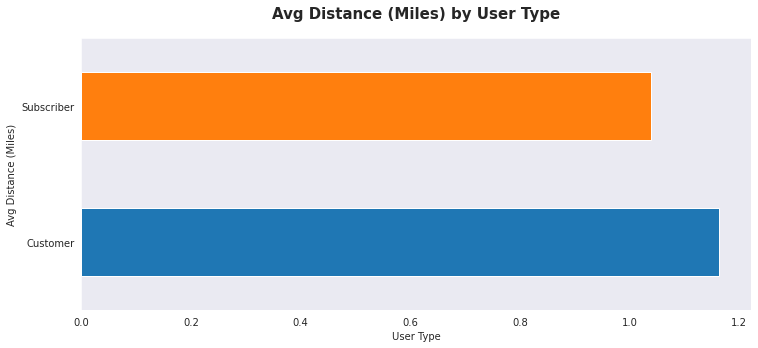

In [49]:
plt = df.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,5))

plt.set_title('Avg Distance (Miles) by User Type', y=1.05, fontsize=15, fontweight='bold');
plt.set_xlabel('User Type');
plt.set_ylabel('Avg Distance (Miles)');
plt.grid();

> Customer riders ride longer distances than subscribers.

### How is the Trends by User Type during weekday?

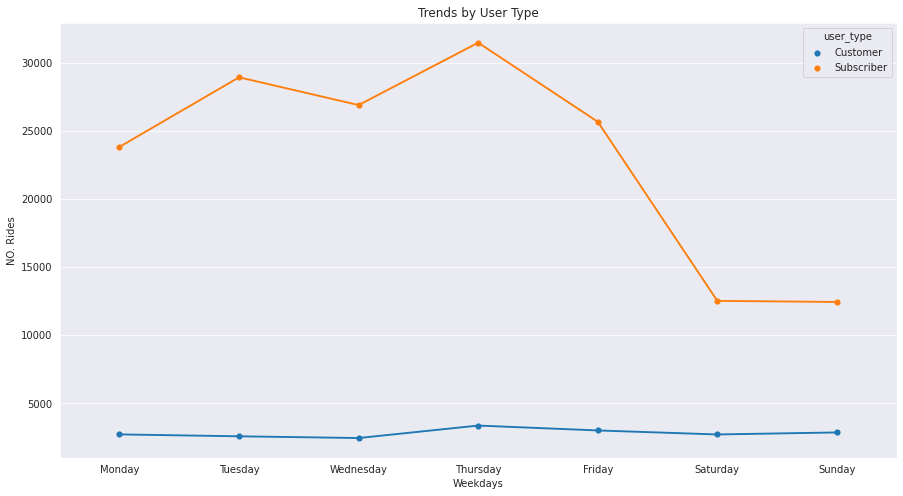

In [50]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7);

ax.set(xlabel= 'Weekdays', ylabel= 'NO. Rides', title= 'Trends by User Type')

ax.figure.set_size_inches(15,8)

> Subscribers' rides are much more than customer during the entire week.

> Subscribers' rides decrease significantly during weekends.

### What is the correlation between rider's age and duration in (min)?

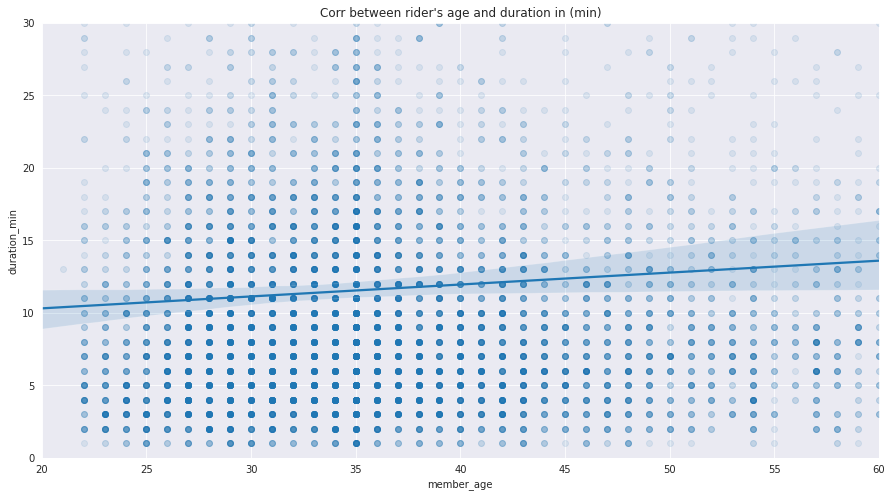

In [57]:
#g = sb.lmplot(x='member_age', y='duration_min', data=samp, facet_kws={'sharey': False, 'sharex': False})

samples = np.random.choice(df.shape[0], 10000, replace = False)
samp = df.reindex(samples)

g= sb.regplot(data= samp, x= 'member_age', y= 'duration_min', truncate=False, scatter_kws={'alpha':0.1})

g.set(ylim=(0, 30));
g.set(xlim=(20, 60));
g.set(title="Corr between rider's age and duration in (min)");
g.figure.set_size_inches(15,8)

> The duration of rides is at highest around age 25-35 and slowly decreases when age is older

### What is the correlation between rider's age and distance in (km)?

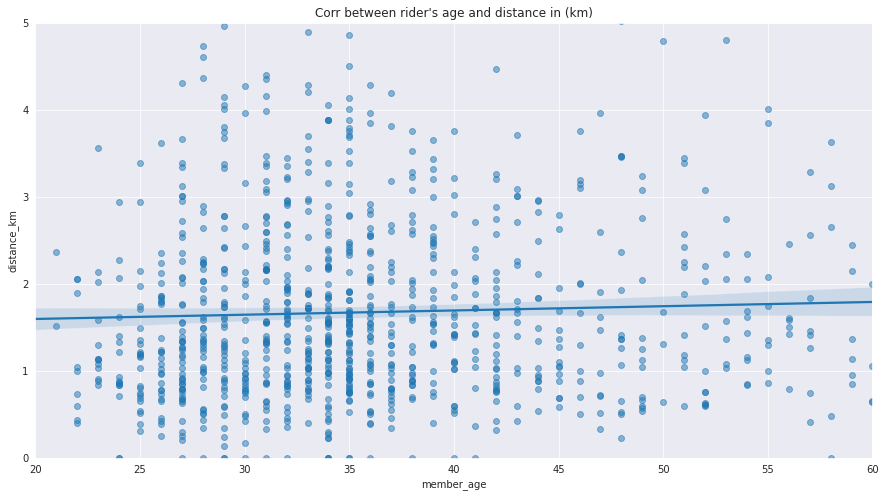

In [58]:
samples = np.random.choice(df.shape[0], 1000, replace = False)
samp = df.reindex(samples)

g= sb.regplot(data= samp, x= 'member_age', y= 'distance_km', truncate=False, scatter_kws={'alpha':0.5})

g.set(ylim=(0, 5));
g.set(xlim=(20, 60));
g.set(title="Corr between rider's age and distance in (km)");
g.figure.set_size_inches(15,8)

> The distance of rides is at highest around age 25-35 and slowly decreases when age is older.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After our Bivariate Exploration we found out the following:
- Even though only 10% of FordGoBike users are customers while the others are subscribers, customer users ride in average more than double the duration a subscriber user does.
- Customer riders ride longer distances than subscribers.
- Subscribers' rides are much more than customer during the entire week
- Subscribers' rides decrease significantly during weekends.
- The duration of rides is at highest around age 25-35 and slowly decreases when age is older.
- The distance of rides is at highest around age 25-35 and slowly decreases when age is older.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other supportive features are observed in our Multivariate Exploration.

## Multivariate Exploration

### What is the Avg. Trip Duration by Weekday (by user type)?

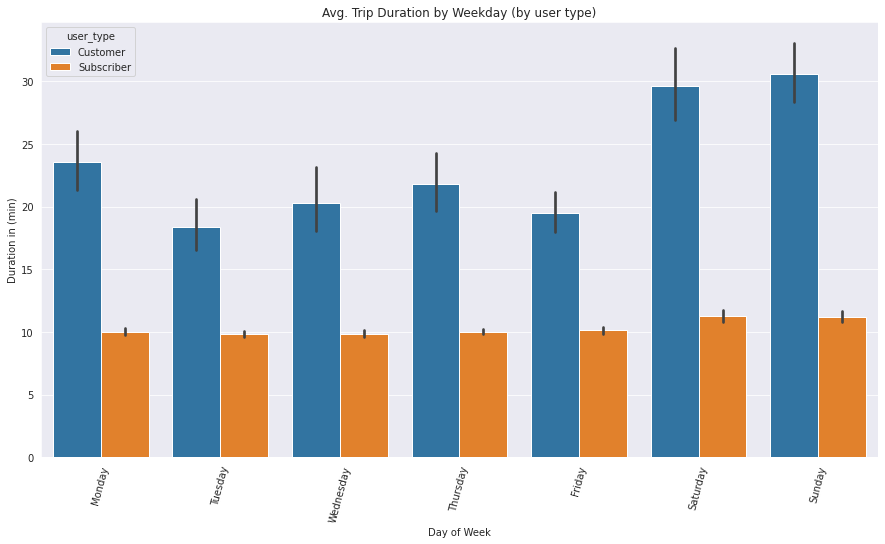

In [59]:
g= sb.barplot(data=df, x='start_time_weekday', y= 'duration_min', hue='user_type');


g.set(title= 'Avg. Trip Duration by Weekday (by user type)', xlabel= 'Day of Week', ylabel= 'Duration in (min)')

g.tick_params(axis='x', rotation=75)
g.figure.set_size_inches(15,8)

> Customer users ride longer than subscribers and the difference significantly increases in weekends.

### What is the weekly bike trips per subscribers' age group?

In [60]:
df['age_bins'] = df['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=65
                                                  else '66 - 75' if 65<x<=75
                                                       else x)

In [61]:
subscriber_age_df = df[df['user_type'] == 'Subscriber'].groupby(['start_time_weekday', 'age_bins']).agg({'bike_id':'count'}).reset_index()

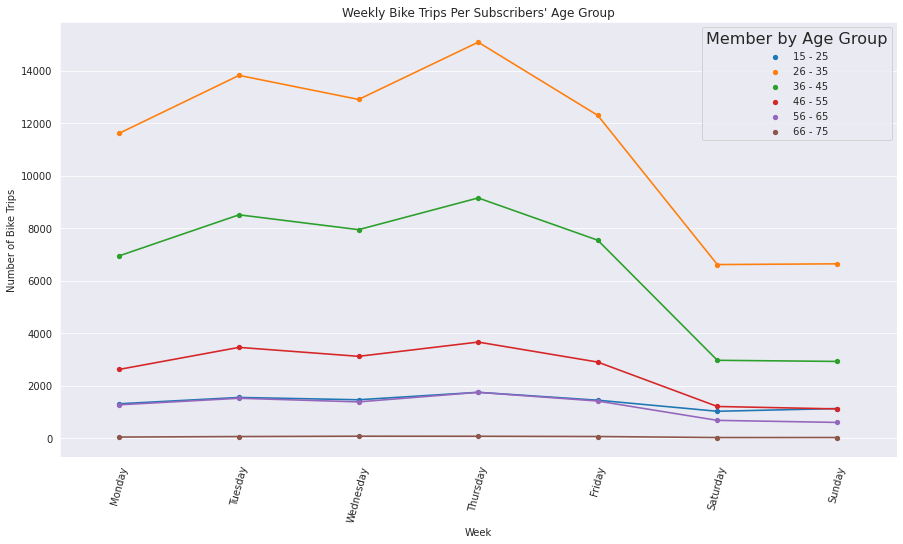

In [62]:
ax = sb.pointplot(data = subscriber_age_df, x='start_time_weekday', y='bike_id', hue='age_bins', scale=.6, height=5, aspect=2);

ax.set(xlabel= 'Week', ylabel= 'Number of Bike Trips', title= "Weekly Bike Trips Per Subscribers' Age Group")

ax.tick_params(axis='x', rotation=75)

# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 16})
ax.figure.set_size_inches(15,8)

> The most frequent age group to use the bike-sharing system is subscribers who are between the ages of 26 and 35. The second most frequent age group of users of the bike-sharing program is those who are 36 to 45 years old, and they exhibit a similar pattern to those who are 26 to 35 years old. There are very few rides available to the youngest age group, 15 to 25 years old, at first (compared to the entire dataset). and finally the rides seems to slowly decrease after the age of 35 when age gets older.

### What is the users' age distribution for Ford GoBike system?

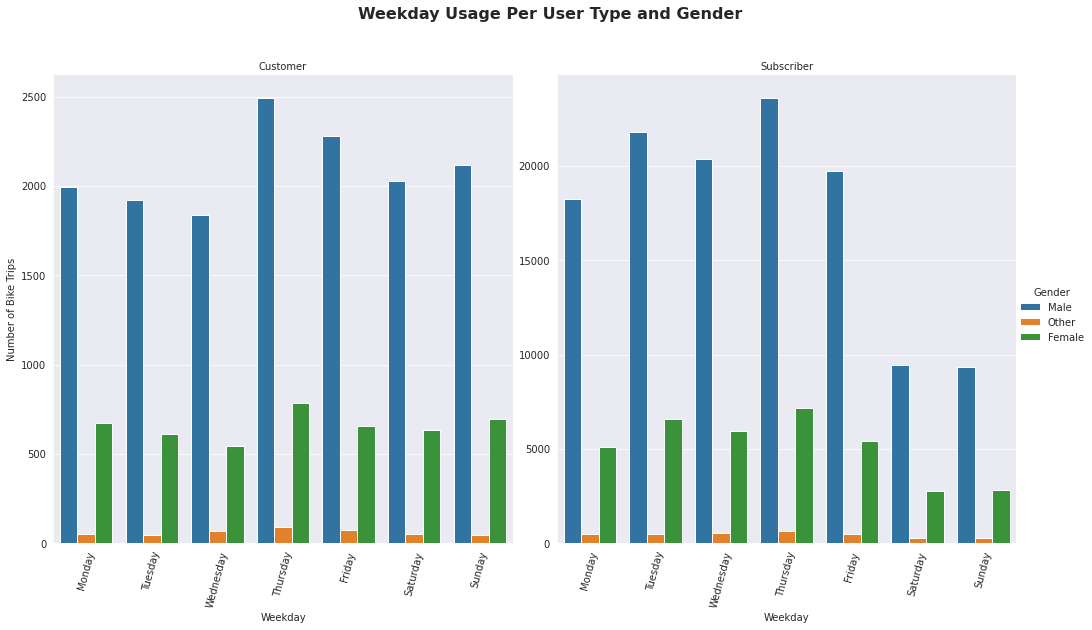

In [63]:
# Weekday usage - user type and gender
ax = sb.catplot(data=df, x='start_time_weekday', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

ax.set_axis_labels("Weekday", "Number of Bike Trips")
ax._legend.set_title('Gender')
ax.set_titles("{col_name}")

ax.fig.suptitle('Weekday Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
ax.set_xticklabels(rotation=75);
ax.figure.set_size_inches(15,8)

> Most trips are done by male, and as we noticed before, subscribers have most of their trips on workdays and less in weekends.

### What is the users' age distribution for Ford GoBike system?

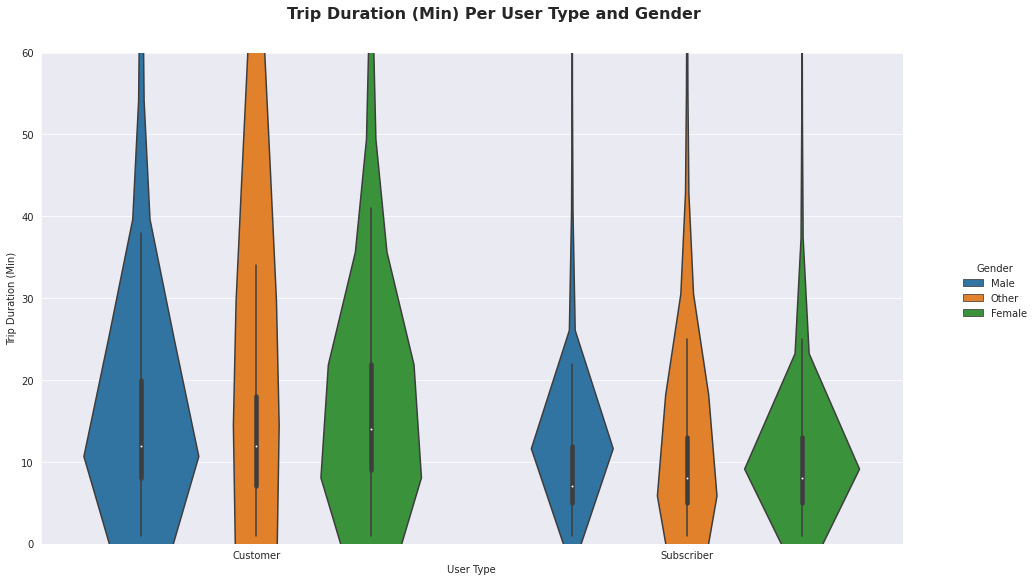

In [64]:
# Violinplot - duration (min) per user type and gender

ax = sb.catplot(data=df, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

ax.set_axis_labels("User Type", "Trip Duration (Min)")
ax._legend.set_title('Gender')
ax.fig.suptitle('Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
ax.set(ylim=(0, 60));
ax.figure.set_size_inches(15,8)

> Customers' rides much longer durations than subscribers no matter what gender they are.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined.

### Were there any interesting or surprising interactions between features?

> The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

## Conclusions

- Most users are male.
- Most users are subscribers.
- Subscribers benefit from it for daily commuting to work.
    - Usually rides on weekdays.
    - Usually rides around 8 am and 6 pm.
    - Usually rides for short distances.
- Customers benefit from it for touring.
    - Usually rides on weekends.
    - Usually rides for long distances.
- The duration and distance of rides is at highest around age 25-35 and slowly decreases when age is older.
- It is an affordable and convenient transportation choice for the people of all socioeconomic classes since the data shows that there is significant amount of rides in each day that are done by all kinds of people (different ages and gender).
